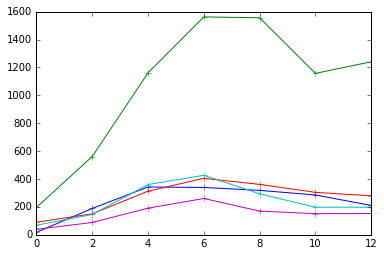

In [11]:
from data import p53dataObj
import numpy as np
import matplotlib.pyplot as plt
from core import linODEGP
from scipy.stats import multivariate_normal
#expr_203409_at

p53data = p53dataObj()

for var in p53data.var_list:
    plt.plot(var[:,0], var[:,3], '+-')
plt.show()

In [97]:
Y = np.column_stack((var[1:,3]) for var in p53data.var_list)
tt = var[:,0]

print Y

[[  188.923    561.1545   150.311    145.583     88.256 ]
 [  342.902   1161.104    312.62     360.15     190.904 ]
 [  339.3149  1561.972    404.8108   426.6762   260.2785]
 [  318.4828  1555.692    361.4937   293.7768   170.0222]
 [  285.5241  1156.999    304.2655   197.8008   151.5118]
 [  210.1645  1240.44     279.7326   198.17     152.6952]]


In [159]:
initCond = Y[0,:]
lscales = np.ones(5)
cscales = np.zeros(5)
cscales[0] = 1.
def basic_fit(aa, ss):
    S = np.zeros((5, 5))
    S[:,0] = ss
    A = np.diag(aa)
    gp = linODEGP(A, initCond, 0., 
                  S=S, withSens=True)
    gp.setKernel((cscales, lscales), 'sq_exp_kern')
    
    mean = gp.mean(tt[1:])
    cov = gp.makeCov_faster2(tt[1:])
    try:
        return multivariate_normal.logpdf(Y.ravel(), mean=mean.ravel(), cov=cov)
    except:
        cov += np.diag(1e-4*np.ones(cov.shape[0]))
        return multivariate_normal.logpdf(Y.ravel(), mean=mean.ravel(), cov=cov)
    
np.random.seed(14)
ss = np.array([1., 0.1, 0.1, 0.1, 0.1])
#a0 = -0.5*np.random.uniform(size=5)
#a0 = np.array([-1.98435936, -0.04232296, -0.26032827, -0.28341201, -0.94390683])
a0 = np.array([-2.78909345, -0.03548324, -0.31942598, -0.36181188, -0.60670806])
#print basic_fit( a0 , ss )

from scipy.optimize import minimize

def objfunc(a):
    try:
        return -basic_fit(a, ss)
    except:
        return np.inf

def objfunc2(par):
    a = par[:5]
    s = par[5:]
    try:
        return -basic_fit(a, s)
    except:
        return np.inf
    
#res = minimize(objfunc, a0, method='Nelder-Mead')
par0 = np.concatenate((a0, ss))
#par0 = np.array([-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
#                 0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626])
#par0 = np.array([-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
#                  0.70000000,  0.10000000,  0.04000000,  0.09000000,  0.09000000])
res2 = minimize(objfunc2, par0, method='Nelder-Mead')
#print res
print res2

 final_simplex: (array([[-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.18631758,  0.04666421,  0.08854267,  0.09589626],
       [-2.84988472, -0.11065842, -0.12050658, -0.32646438, -0.64336492,
         0.70245829,  0.1863

In [157]:
print res2.x

[-2.80056082 -0.11420469 -0.12130673 -0.32598485 -0.64255799  0.71338955
  0.18775623  0.04719191  0.08843343  0.09550159]


In [127]:
C = np.zeros((5, 5))
C[0,0] = 1.

S = np.zeros((5, 5))
S[:, 0] = np.ones(5)
print np.dot(S, np.dot(C, S.T))

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
